### Week 5
### DSC 650
### Abed Tabbalat

In [1]:
# Mounting drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment05')
!pwd

Mounted at /content/drive
/content/drive/My Drive/DSC650/Original/dsc650/assignments/assignment05


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import imdb

## Importing Data

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 1s 0us/step


## Data Prep

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))

    # Set specific indices of results[i] to 1s
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.

    return results

# Vectorize the training data
x_train = vectorize_sequences(train_data)

# Vectorize the test data
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model

In [6]:
# Build a Keras sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
# Compile the model using RMSprop optimizer and binary crossentropy loss function
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Compile the model using RMSprop optimizer with a learning rate of 0.001 and binary crossentropy loss function
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Compile the model using RMSprop optimizer with a learning rate of 0.001 and binary crossentropy loss function and binary accuracy metric
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
# Split the training data into a validation set and a partial training set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

# Split the training labels into a validation set and a partial training set
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# Compile the model using RMSprop optimizer, binary crossentropy loss function, and accuracy metric
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model using the partial training data and validation set
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 83ms/step - loss: 0.5298 - acc: 0.7732 - val_loss: 0.3935 - val_acc: 0.8708
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.3259 - acc: 0.8933 - val_loss: 0.3138 - val_acc: 0.8845
Epoch 3/20
30/30 [==============================] - 2s 70ms/step - loss: 0.2381 - acc: 0.9219 - val_loss: 0.2976 - val_acc: 0.8801
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1936 - acc: 0.9376 - val_loss: 0.2776 - val_acc: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1616 - acc: 0.9491 - val_loss: 0.3250 - val_acc: 0.8738
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1382 - acc: 0.9555 - val_loss: 0.2828 - val_acc: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1178 - acc: 0.9653 - val_loss: 0.3167 - val_acc: 0.8804
Epoch 8/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1009 - a

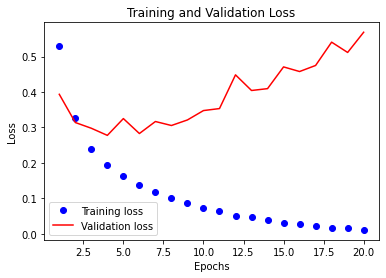

In [10]:
# Get the training and validation loss values from the history dictionary
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs
epochs = range(1, len(loss_values) + 1)

# Plot the training and validation loss values
plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' is for blue dot
plt.plot(epochs, val_loss_values, 'r', label='Validation loss') # 'r' is for red line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

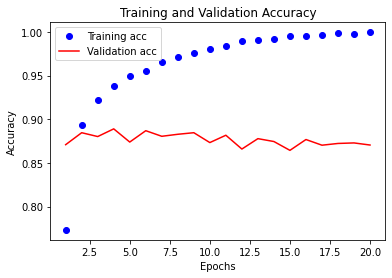

In [11]:
# Clear the current figure
plt.clf()

# Get the training and validation accuracy values from the history dictionary
acc = history_dict['acc']
val_acc = history_dict['val_acc']

# Get the number of epochs
epochs = range(1, len(acc) + 1)

# Plot the training and validation accuracy values
plt.plot(epochs, acc, 'bo', label='Training acc') # 'bo' is for blue dot
plt.plot(epochs, val_acc, 'r', label='Validation acc') # 'r' is for red line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# Define the model architecture
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model using RMSprop optimizer, binary crossentropy loss function, and accuracy metric
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the training data
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the model using the testing data
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 58ms/step - loss: 0.4519 - accuracy: 0.8188
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2665 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2100 - accuracy: 0.9244
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2880 - accuracy: 0.8846


In [13]:
results

[0.2879554033279419, 0.8845599889755249]

In [14]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.21843332],
       [0.99958235],
       [0.8934188 ],
       ...,
       [0.12863925],
       [0.08058555],
       [0.58139265]], dtype=float32)